In [ ]:
!ls


covid_19_data.csv		    time_series_covid_19_confirmed_US.csv
covid_data.csv.zip		    time_series_covid_19_deaths.csv
sample_data			    time_series_covid_19_deaths_US.csv
time_series_covid_19_confirmed.csv  time_series_covid_19_recovered.csv


   SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0  
Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')


/tmp/ipython-input-4229824855.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10.values, y=top10.index, palette="Reds_r")


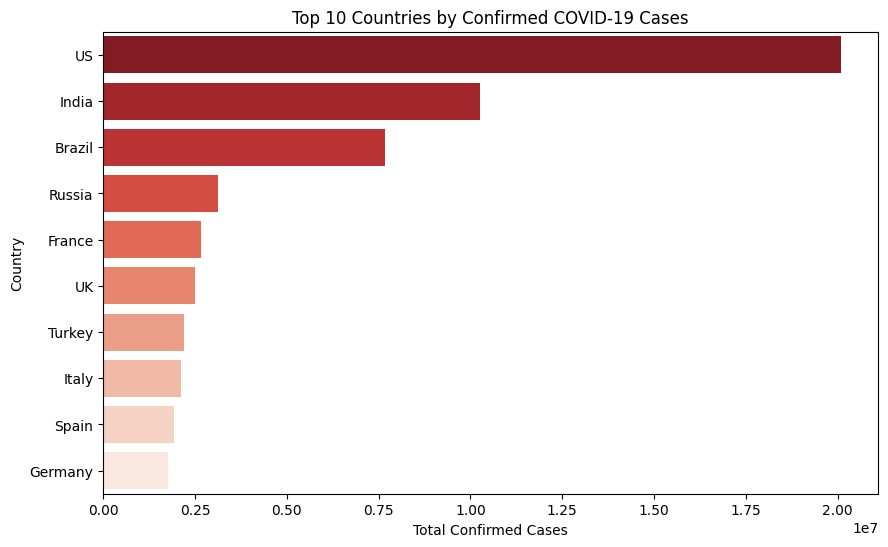

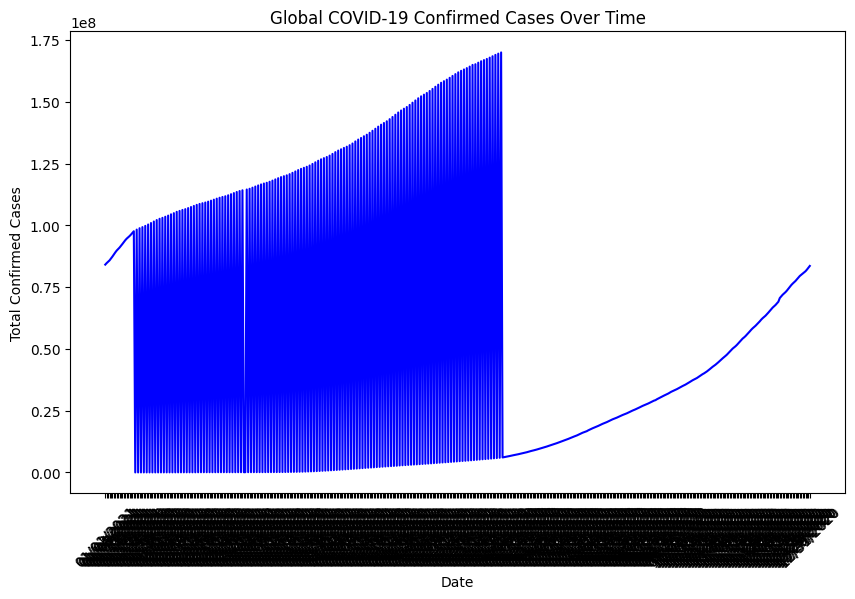

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data = pd.read_csv("covid_19_data.csv")

# Check what columns are available
print(data.head())
print(data.columns)

# Clean up the data a bit
data = data.rename(columns={"Country/Region": "Country"})
latest_data = data[data["ObservationDate"] == data["ObservationDate"].max()]

# Visualization 1: Top 10 countries by confirmed cases
top10 = latest_data.groupby("Country")["Confirmed"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top10.values, y=top10.index, palette="Reds_r")
plt.title("Top 10 Countries by Confirmed COVID-19 Cases")
plt.xlabel("Total Confirmed Cases")
plt.ylabel("Country")
plt.show()

# Visualization 2: Global trend of confirmed cases over time
trend = data.groupby("ObservationDate")["Confirmed"].sum().reset_index()

plt.figure(figsize=(10,6))
plt.plot(trend["ObservationDate"], trend["Confirmed"], color="blue")
plt.title("Global COVID-19 Confirmed Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Confirmed Cases")
plt.xticks(rotation=45)
plt.show()


In [ ]:
!pwd
!ls


/content
covid_19_data.csv		    time_series_covid_19_confirmed_US.csv
covid_data.csv.zip		    time_series_covid_19_deaths.csv
sample_data			    time_series_covid_19_deaths_US.csv
time_series_covid_19_confirmed.csv  time_series_covid_19_recovered.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)


In [ ]:
data = pd.read_csv("covid_19_data.csv")
data.head()


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [ ]:
print("Rows × Columns:", data.shape)
print("\nColumn names:", data.columns.tolist())
print("\nMissing values:\n", data.isnull().sum())


Rows × Columns: (306429, 8)

Column names: ['SNo', 'ObservationDate', 'Province/State', 'Country/Region', 'Last Update', 'Confirmed', 'Deaths', 'Recovered']

Missing values:
 SNo                    0
ObservationDate        0
Province/State     78103
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64


In [ ]:
# Standardize column names
data = data.rename(columns={"Country/Region": "Country",
                            "Province/State": "Province",
                            "ObservationDate": "Date"})

# Convert date to datetime
data["Date"] = pd.to_datetime(data["Date"])

# Handle missing province names
data["Province"] = data["Province"].fillna("")

# Preview
data.head()


,SNo,Date,Province,Country,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


/tmp/ipython-input-617929378.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10.values, y=top10.index, palette="Reds_r")


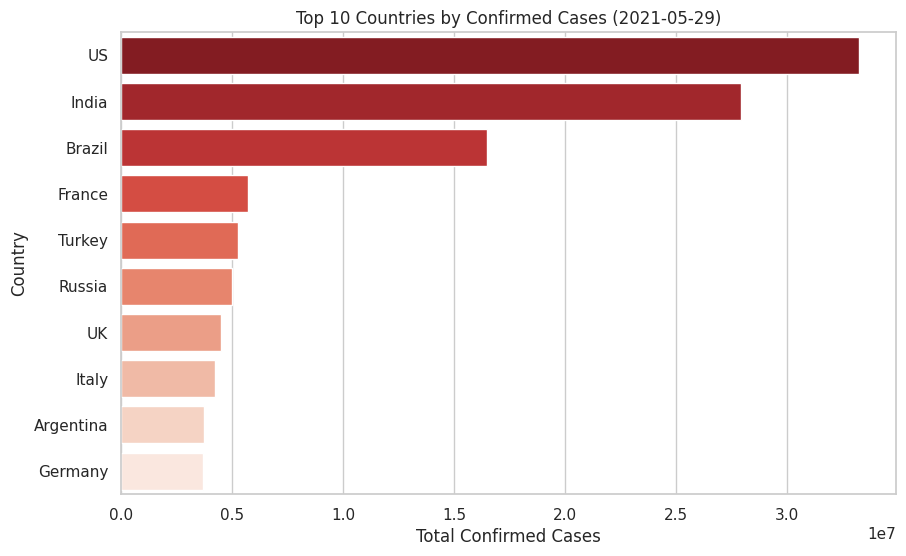

In [ ]:
latest_date = data["Date"].max()
latest = data[data["Date"] == latest_date]

top10 = (latest.groupby("Country")["Confirmed"]
         .sum()
         .sort_values(ascending=False)
         .head(10))

sns.barplot(x=top10.values, y=top10.index, palette="Reds_r")
plt.title(f"Top 10 Countries by Confirmed Cases ({latest_date.date()})")
plt.xlabel("Total Confirmed Cases")
plt.ylabel("Country")
plt.show()


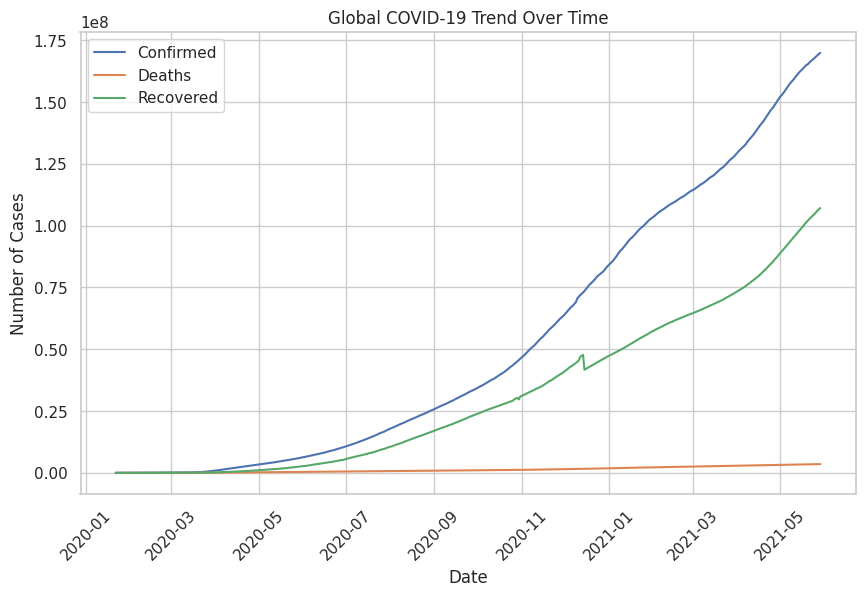

In [ ]:
trend = data.groupby("Date")[["Confirmed", "Deaths", "Recovered"]].sum().reset_index()

plt.plot(trend["Date"], trend["Confirmed"], label="Confirmed")
plt.plot(trend["Date"], trend["Deaths"], label="Deaths")
plt.plot(trend["Date"], trend["Recovered"], label="Recovered")
plt.title("Global COVID-19 Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.legend()
plt.xticks(rotation=45)
plt.show()


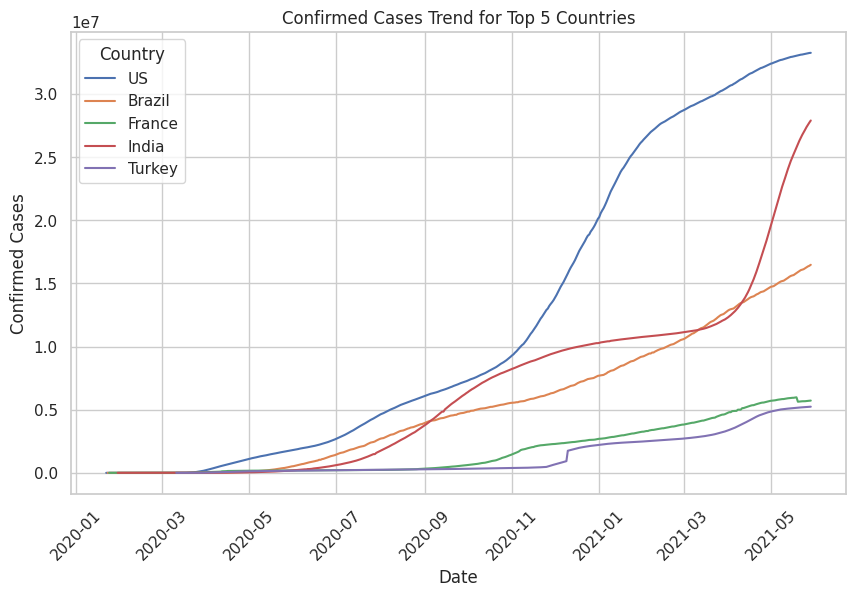

In [ ]:
top5_countries = top10.index[:5]
subset = data[data["Country"].isin(top5_countries)]
subset_grouped = subset.groupby(["Date","Country"])["Confirmed"].sum().reset_index()

sns.lineplot(data=subset_grouped, x="Date", y="Confirmed", hue="Country")
plt.title("Confirmed Cases Trend for Top 5 Countries")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.xticks(rotation=45)
plt.show()


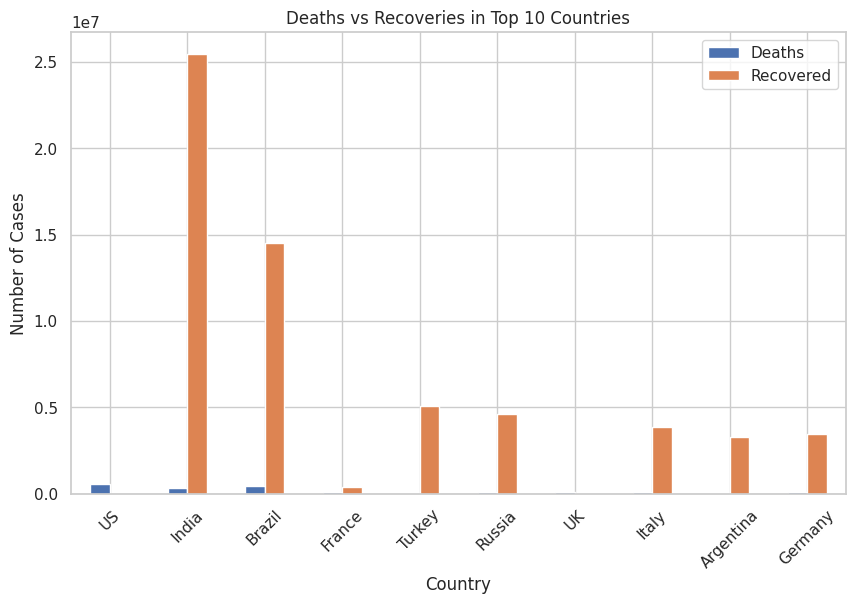

In [ ]:
deaths = latest.groupby("Country")["Deaths"].sum()
recoveries = latest.groupby("Country")["Recovered"].sum()
compare = pd.DataFrame({"Deaths": deaths, "Recovered": recoveries}).loc[top10.index]

compare.plot(kind="bar", figsize=(10,6))
plt.title("Deaths vs Recoveries in Top 10 Countries")
plt.xlabel("Country")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45)
plt.show()


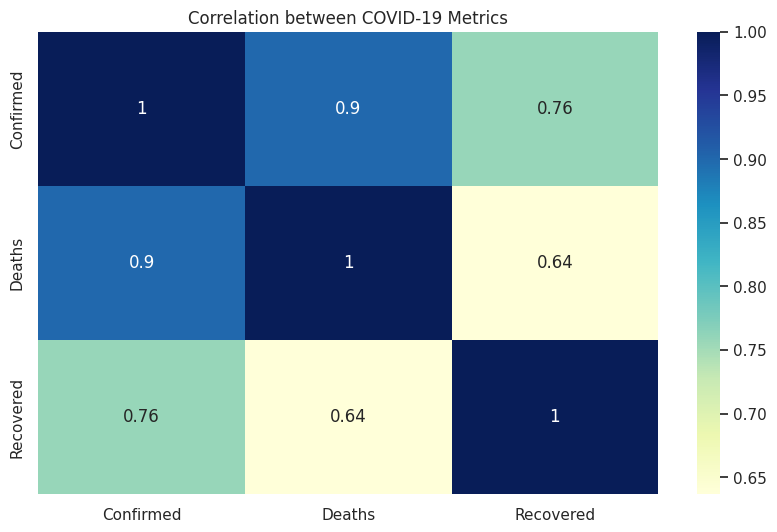

In [ ]:
corr = latest[["Confirmed", "Deaths", "Recovered"]].corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.title("Correlation between COVID-19 Metrics")
plt.show()
